<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Data-Management/blob/main/week_09/Text_Representation_and_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 예시 문서
docs = ["I like data science", "Data science is fun", "I enjoy machine learning"]

# 2. 텍스트 벡터화 (TF-IDF)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)  # 희소 행렬 (sparse matrix)
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10 stored elements and shape (3, 8)>

In [ ]:
# prompt: X를 데이터프레임으로 만드는 코드만

import pandas as pd

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df

,data,enjoy,fun,is,learning,like,machine,science
0,0.517856,0.00000,0.000000,0.000000,0.00000,0.680919,0.00000,0.517856
1,0.428046,0.00000,0.562829,0.562829,0.00000,0.000000,0.00000,0.428046
2,0.000000,0.57735,0.000000,0.000000,0.57735,0.000000,0.57735,0.000000


In [ ]:
# 3. Truncated SVD 적용
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X)

X_reduced

array([[ 8.49509422e-01, -2.13933769e-17],
       [ 8.49509422e-01,  4.51246456e-17],
       [-6.48784151e-17,  1.00000000e+00]])

In [ ]:
# prompt: X와 X_reduced의  총변동을 구하고 비교하라

import numpy as np

# X의 총 변동 (분산) 계산
total_variance_X = np.var(X.toarray(), axis=0).sum()

# X_reduced의 총 변동 (분산) 계산
total_variance_X_reduced = np.var(X_reduced, axis=0).sum()

print(f"X의 총 변동: {total_variance_X}")
print(f"X_reduced의 총 변동: {total_variance_X_reduced}")

# 두 변동의 비교 (예: 비율 계산)
variance_ratio = total_variance_X_reduced / total_variance_X
print(f"X_reduced의 총 변동 / X의 총 변동: {variance_ratio}")

X의 총 변동: 0.5681483301072139
X_reduced의 총 변동: 0.3825925016130596
X_reduced의 총 변동 / X의 총 변동: 0.6734024925161031


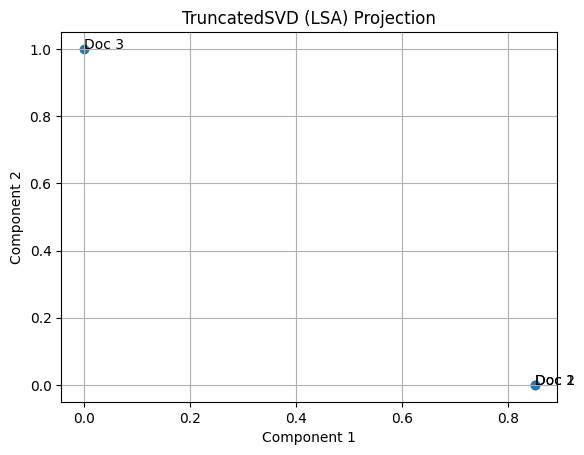

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
for i, doc in enumerate(docs):
    plt.annotate(f"Doc {i+1}", (X_reduced[i, 0], X_reduced[i, 1]))
plt.title("TruncatedSVD (LSA) Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [ ]:
# prompt: doc 1, 2, 3의 간의 cosine similarity를 구하라

from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all document pairs
similarity_matrix = cosine_similarity(X)

# Print the similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

# Print the cosine similarity between specific documents
print(f"\nCosine Similarity between Doc 1 and Doc 2: {similarity_matrix[0, 1]}")
print(f"Cosine Similarity between Doc 1 and Doc 3: {similarity_matrix[0, 2]}")
print(f"Cosine Similarity between Doc 2 and Doc 3: {similarity_matrix[1, 2]}")


Cosine Similarity Matrix:
[[1.         0.44333251 0.        ]
 [0.44333251 1.         0.        ]
 [0.         0.         1.        ]]

Cosine Similarity between Doc 1 and Doc 2: 0.44333251451753725
Cosine Similarity between Doc 1 and Doc 3: 0.0
Cosine Similarity between Doc 2 and Doc 3: 0.0


## **MNIST → TruncatedSVD(2D) → 시각화 코드**

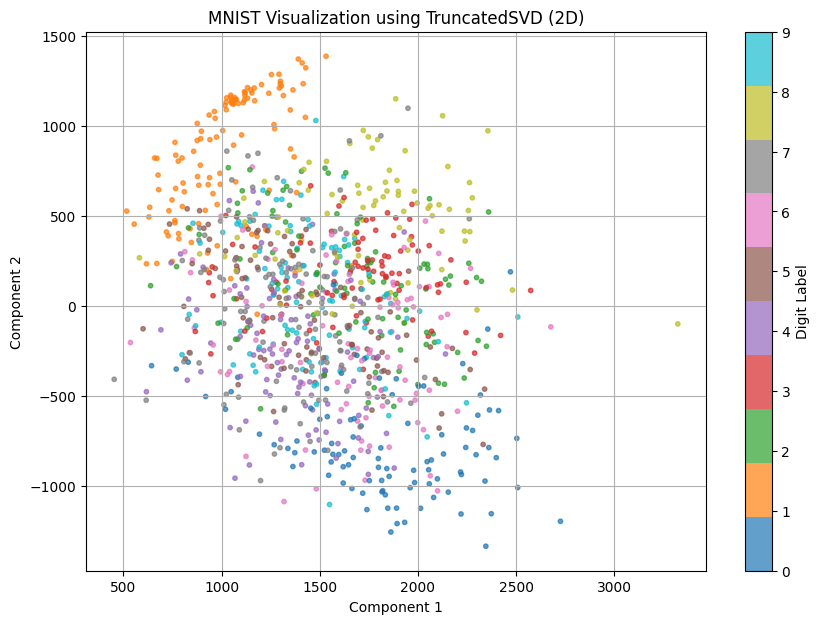

In [ ]:
# 필요한 라이브러리 import
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# 1. MNIST 데이터 불러오기 (28x28 = 784차원 벡터)
print("Downloading MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target']
y = y.astype(int)

# 2. 데이터 일부 샘플링 (전체 70,000개는 느릴 수 있으니 1000개만 사용)
N = 1000
X_subset = X[:N]
y_subset = y[:N]

# 3. TruncatedSVD로 차원 축소 (2차원)
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_subset)

# 4. 결과 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_subset, cmap="tab10", alpha=0.7, s=10)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.title("MNIST Visualization using TruncatedSVD (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()


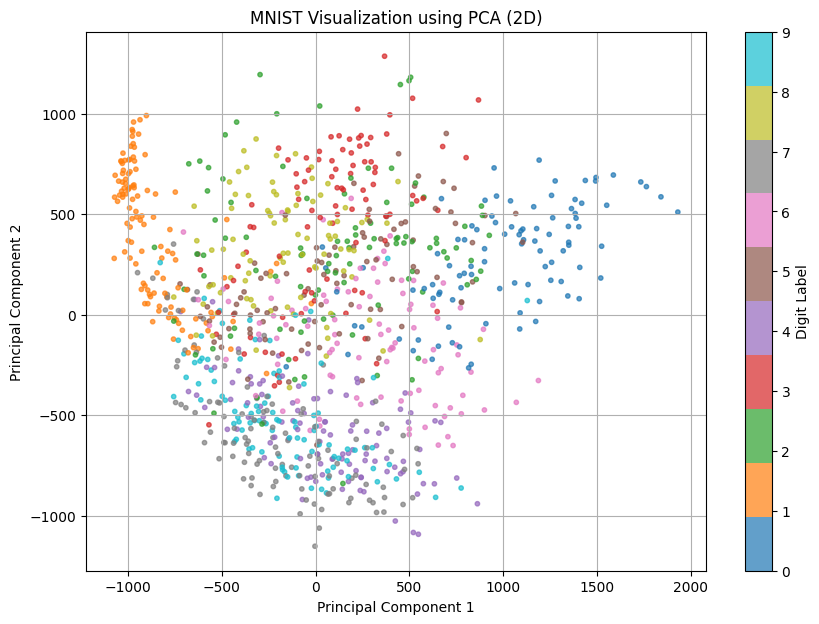

In [ ]:
from sklearn.decomposition import PCA

# 3. PCA 적용 (2차원)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_subset)

# 4. 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset, cmap='tab10', alpha=0.7, s=10)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.title("MNIST Visualization using PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


In [ ]:
import plotly.express as px

# 2. 홀수 숫자만 필터링 (1, 3, 5, 7, 9)
odd_mask = np.isin(y, [1, 3, 5, 7, 9])
X_odd = X[odd_mask]
y_odd = y[odd_mask]

# 3. 샘플링 (너무 많으면 느려지니 일부 사용)
N = 2000
X_sample = X_odd[:N]
y_sample = y_odd[:N]

# 4. PCA로 3차원 축소
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_sample)

# 5. Plotly로 3D 시각화
fig = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color=y_sample.astype(str),
    title="MNIST Odd Digits (1,3,5,7,9) - PCA 3D Visualization",
    labels={"x": "PC1", "y": "PC2", "z": "PC3"},
    opacity=0.25
)

fig.update_traces(marker=dict(size=4))
fig.show()

### **실전문제. 영화장르 구분하기**

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD


In [ ]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :',len(documents))

샘플의 수 : 11314


In [ ]:
dataset.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
# prompt: dataset.target_names에서 무작위로 3개 만 골라, 아주 간단하 ㄴ코드로

import random

random_targets = random.sample(list(dataset.target_names), 3)
random_targets

['misc.forsale', 'comp.sys.ibm.pc.hardware', 'sci.electronics']

In [ ]:
# prompt: 장르 5개만 받아오기

# 2. 홀수 숫자만 필터링 (1, 3, 5, 7, 9) -  영화 장르에 맞게 수정
# 예시: 5개의 장르만 선택 (뉴스그룹 데이터셋의 카테고리명을 실제 장르로 변경해야 함)
# target_genres = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.guns']  # 실제 장르로 바꿔야 함
target_genres = random_targets

dataset = fetch_20newsgroups(subset='all', categories=target_genres, shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('샘플의 수 :', len(documents))
print('장르 목록 :', dataset.target_names)


샘플의 수 : 2941
장르 목록 : ['comp.sys.ibm.pc.hardware', 'misc.forsale', 'sci.electronics']


In [ ]:
documents[3]

'Article 10886 of alt.radio.scanner:\nPath: usenet.ins.cwru.edu!cleveland.Freenet.Edu!aj008\nFrom: aj008@cleveland.Freenet.Edu (Aaron M. Barnes)\nSubject: Realistic PRO-2024 for sale-was $200,sell for $150 obo\nDate: 20 Apr 1993 16:01:28 GMT\nOrganization: Case Western Reserve University, Cleveland, Ohio (USA)\nLines: 26\nMessage-ID: <1r16oo$3du@usenet.INS.CWRU.Edu>\nNNTP-Posting-Host: slc10.ins.cwru.edu\n\n\nHello.\n\nI have a Realistic PRO-2024 scanner for sale.Here is a small desc\nription:\n\n60 programible chanels\nfully detailed backlighted digital display\nheadphone jack\nantenna jack\nremovable telescoping antenna\nauto search\n\ncoverage:\n30-50mHz\n118-174mHz\n380-512mHz\n\nIt originally cost $200, but I will sell for $150.\n\nThank You.\n-- \n       / /     Buchanan in `96!\n      / /      Fear the goverment that fears your guns.\n  \\ \\/ /       Without the 2nd amendment, we cannot guarantee ou\n   \\/ /        r freedoms.           aj008@cleveland.freenet.edu'

#### 실습과제 1.
- 특수 문자 제거
- 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
- 전체 단어에 대한 소문자 변환
- NLTK로부터 불용어를 다운받아 불용어 전처리
- TF-IDF 행렬 만들기(TfidfVectorizer를 통해 단어 1,000개에 대한 TF-IDF 행렬)

In [ ]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ", regex=True)
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())


In [ ]:
news_df['clean_doc'][1]


'except their size cooling towers nuclear power plants vertually identical construction operation cooling towers designed built hundred years coal fired power plants used lighting early electric railways basicly cylindrical tower supports rapid draft when heated water steam circulating thru network pipes that fill about lower tower assist cooling draft water misters added that spray cold water over pipes cold water evaporates removing heat faster than just flow from draft would resulting water vapor rapidly carried away draft this produces clouds frequently seen rising these towers that slight pinch maybe tower there because produces very significant increase strength rate draft produced compared straight cylinder shape towers used recondense steam sealed steam system power plant that recirculated back boiler used again wider temperature difference across turbines used power plant more effecient they recondensing steam cooling towers before sending back boilers maintain very wide tempe

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# NLTK로부터 불용어를 받아온다.
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# 불용어를 제거합니다.


In [ ]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc


In [ ]:
news_df['clean_doc'][1]


'except size cooling towers nuclear power plants vertually identical construction operation cooling towers designed built hundred years coal fired power plants used lighting early electric railways basicly cylindrical tower supports rapid draft heated water steam circulating thru network pipes fill lower tower assist cooling draft water misters added spray cold water pipes cold water evaporates removing heat faster flow draft would resulting water vapor rapidly carried away draft produces clouds frequently seen rising towers slight pinch maybe tower produces significant increase strength rate draft produced compared straight cylinder shape towers used recondense steam sealed steam system power plant recirculated back boiler used wider temperature difference across turbines used power plant effecient recondensing steam cooling towers sending back boilers maintain wide temperature difference sometimes high degrees first stage turbine final stage cold turbine coslet'

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, # 상위 1,000개의 단어를 보존
max_df = 0.5, smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

# TF-IDF 행렬의 크기 확인
print('TF-IDF 행렬의 크기 :',X.shape)


TF-IDF 행렬의 크기 : (2734, 1000)


<ipython-input-61-dbdb7ddb90cf>:7: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



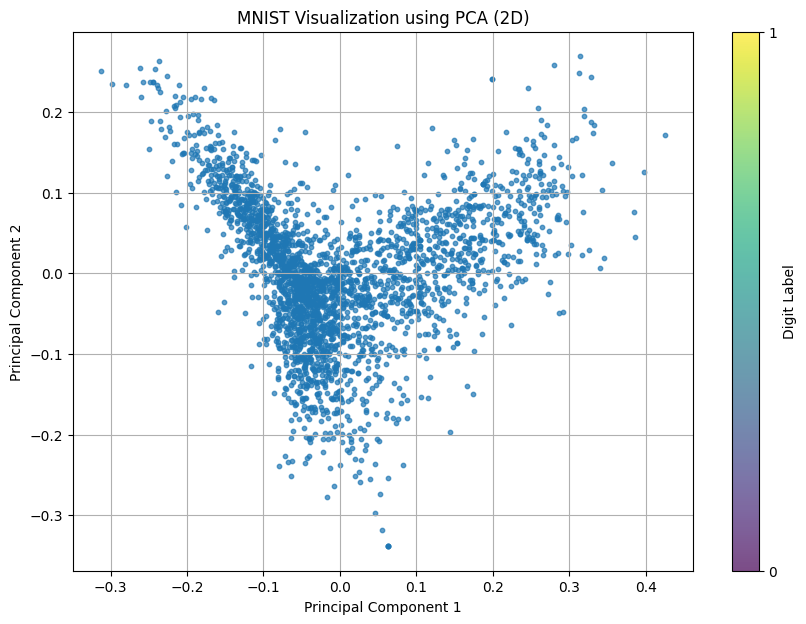

In [ ]:
# 3. PCA 적용 (2차원)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# 4. 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='tab10', alpha=0.7, s=10)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.title("MNIST Visualization using PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [ ]:
dataset.target

array([1, 1, 1, ..., 2, 2, 0])

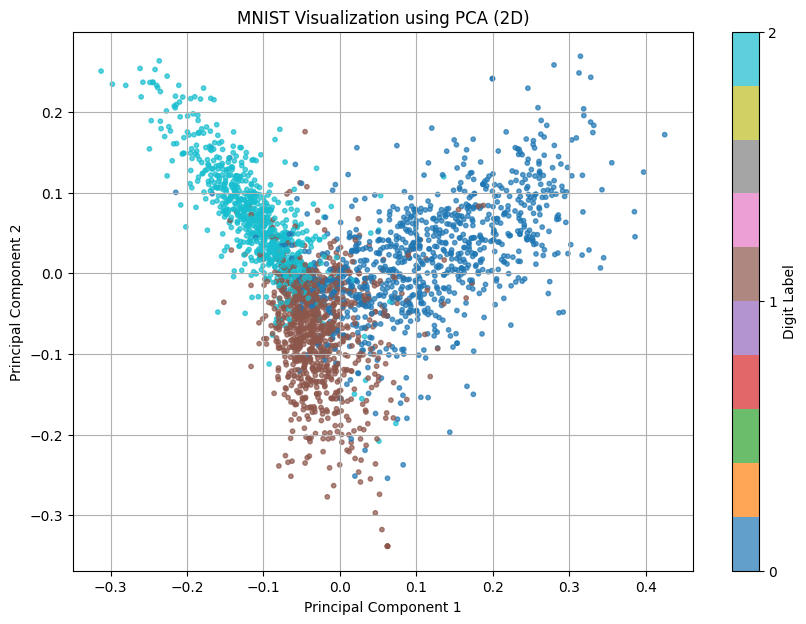

In [ ]:
# 4. 시각화
plt.figure(figsize=(10, 7))
# The 'c' argument is moved to plt.scatter to assign colors based on dataset.target
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dataset.target, cmap='tab10', alpha=0.7, s=10)
plt.colorbar(scatter, ticks=range(5), label="Digit Label")  # Removed 'c' argument
plt.title("MNIST Visualization using PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [ ]:
# prompt: 3차원으로 그려줘

# 4. PCA로 3차원 축소
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

# 5. Plotly로 3D 시각화
fig = px.scatter_3d(
    x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
    color=dataset.target.astype(str), # dataset.target 사용
    title="Newsgroup Genres - PCA 3D Visualization",
    labels={"x": "PC1", "y": "PC2", "z": "PC3"},
    opacity=0.5
)

fig.update_traces(marker=dict(size=4))
fig.show()


# <font color='orange'> **실제로 장르(Genre)가 몇 개인지 알 수 있을까?**

## **그렇다면 몇 개의 장르가 있는지 어떻게 Guess를 하지?**